## MTH 9879 Market Microstructure Models,    Spring 2016

<p>

### Lecture 6: Variance and covariance estimation

<p>

Jim Gatheral
Department of Mathematics   
  
  
<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/BaruchLogo2.png" align = "left" width=160></h3>  


<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/MFElogo.png" align = "right" width=100></h3>


$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\cL}{\mathcal{L} }
\newcommand{\cG}{\mathcal{G} }
\newcommand{\Xv}{X^{(v)}}
\newcommand{\s}{\mathcal{S} }
\newcommand{\cE}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\tr}{\mbox{tr}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\eefm}[2]{{\mathbb{E}^{#2}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\angl}[1]{{\langle{#1}\rangle}}
$$




## Outline of Lecture 6

-   Uses of volatility estimates

-   Market microstructure bias

-   A survey of estimation and forecasting algorithms

-   Experimental results



### Motivation

-   We often need to estimate in-sample volatility. Typically we need a
    good volatility estimate to reduce errors in estimating parameters
    of:

    -   Market impact models

    -   Limit order fill models
    
    - Market making: Avellaneda and Stoikov (Lecture 3) and other such algorithms need volatility forecasts.

-   Volatility forecasting models
    - Without good in-sample volatility  estimates, how can we even assess the quality of volatility forecasts?
    - Also, it has been shown that the performance of volatility
    forecasting models may be improved if they use better estimates of
    realized variance.

### Uses of volatility forecasts

-   Option valuation

-   Risk estimation

-   Order fill probability

-   For the first two of these, we need to estimate the width of the
    distribution of relatively long-timescale returns.

-   For the order fill probability, we need a volatility to estimate the
    first passage time density. Given that the underlying stochastic
    process is not Brownian motion, there is no a priori reason why the
    volatility numbers required for these quite different computations
    should be the same.

-   We will focus on measuring the width of the distribution of returns.

### Choice of sampling scheme

It is important to sample in transaction time rather than in business
time or calendar time.

-   In transaction time, empirically observed returns from trade data are MA(1).
    - Autocorrelation coefficients are insignificant after one lag.

-   In calendar time, with varying intensity, empirically observed
    returns are ARIMA.



### TAQ data cleaning

Data cleaning is critical. Here again follows a recipe for TAQ cleaning due to
[Barndorff-Nielsen et al.]<sup id="cite_ref-BNS" class="reference"><a href="#cite_note-BNS"><span>[</span>1<span>]</span></a></sup> and implemented in the R-package `highfrequency`:

<span>**All data**</span>

- Delete entries with a timestamp outside the 9:30am–4pm window when the exchange is open.
- Delete entries with a bid, ask or transaction price equal to zero.
- Retain entries originating from a single exchange (NYSE in our application). Delete other entries.

<span>**Quote data only**</span>

- When multiple quotes have the same time stamp, we replace all these with a single entry with the median bid and median ask price.
- Delete entries for which the spread is negative.
- Delete entries for which the spread is more that 50 times the median spread on that day.
- Delete entries for which the mid-quote deviated by more than 10 mean absolute deviations from a rolling centered median (excluding the observation under consideration) of 50 observations (25 observations before and 25 after).

<span>**Trade data only**</span>

- Delete entries with corrected trades. (Trades with a Correction Indicator, CORR $\neq$ 0).
- Delete entries with abnormal Sale Condition. (Trades where COND has a letter code, except for E and F). See the TAQ 3 Users Guide for additional details about sale conditions.
- If multiple transactions have the same time stamp, use the median price.
- Delete entries with prices that are above the ask plus the bid–ask spread. Similar for entries with prices below the bid minus the bid–ask spread.

### Realized Variance

Given a set of tick data, how can we measure variance? The naïve answer
would be to compute the statistic

$$\frac{1}{T}\,\sum_i^T\,\log \left( \frac{S_i}{S_{i-1}}\right)^2$$ 

where the $S_i$ are
successive prices in the dataset.

-   This estimator is called the Realized Variance (RV) estimator



### An exact relation

-   The following relation is exact:
    $$(p_T-p_0)^2 = \sum_{i = 1}^T \,r_i^2 + 2\sum_{k = 1}^{T-1}\,\gamma(k)$$
    where $r_i = p_i-p_{i-1}$ and
    $\gamma(k) = \sum_{i = 1}^{T-k}r_i \,r_{i+k}$.


-   So if returns are serially uncorrelated then an unbiased and
    efficient estimate of the daily realized variance can be obtained as
    the sum of squared intra-day returns (RV).

-   However, intra-day returns sampled at the highest frequency will
    generally exhibit serial correlation thereby invalidating RV as a
    reliable variance estimator.


-   The estimators we discuss below are all motivated by this reasoning
    and aim to provide improved measures of the realized variance.

### Microstructure noise

In the limit of very high sampling frequency, RV picks up mainly market
microstructure noise. To see this, suppose that the observed price $Y_t$
is given by

$$Y_t =X_t +\epsilon_t$$

where $X_t$ is the value of the
underlying (log-)price process of interest and $\epsilon_t$ is a random
market microstructure-related noise term. Suppose we sample the price
series $n+1$ times (so that there are $n$ price changes) in the time
interval $T$. 

Then as $n\to\infty$,

$$
\beas[Y,Y] &:=&\sum^T\,(Y_i-Y_{i-1})^2\sim[X,X]+2\,n\,Var[\epsilon]\\&=&\sigma^2+2\,n\,Var[\epsilon]
\eeas
$$

where $\sigma^2$ is the (true) integrated variance for the whole period.

-   The estimated variance $[Y,Y]$ increases without limit as
    $n \to \infty$.

### BAC trades

BAC data from 04-May-2012.

In [12]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip", destfile="RvEstimators.R.zip")
unzip(zipfile="RvEstimators.R.zip")

In [13]:
library(highfrequency)
load("tq.rData")
source("RvEstimators.R") # Code mostly due to Roel Oomen

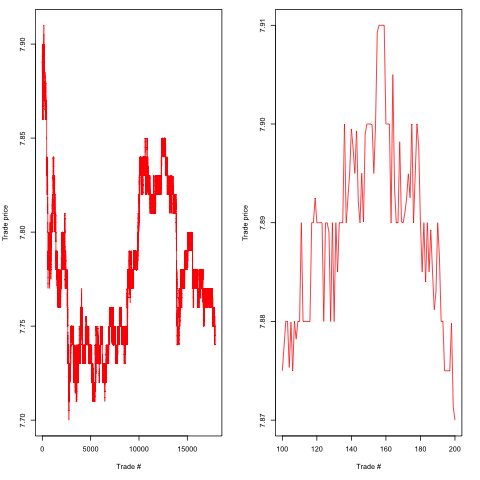

In [3]:
px <- tqBAC$PRICE
p <- as.numeric(px)

# Plot time series of trades
par(mar=c(5, 4, 1, 2) + 0.1)
par(mfrow=c(1,2),cex=0.6)
plot(p,col="red",type="l",ylab="Trade price",xlab="Trade #")
plot(100:200,p[100:200],col="red",type="l",ylab="Trade price",xlab="Trade #")
par(mfrow=c(1,1))

### Autocorrelation of BAC trade price changes

<span>BAC data from 04-May-2012.</span>

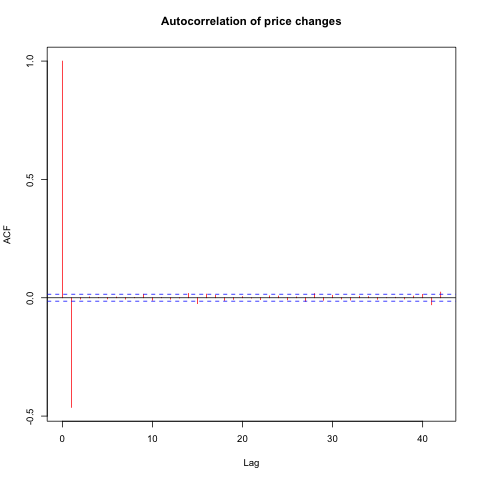

In [14]:
par(mar=c(5, 4, 4, 2) + 0.1,cex=0.8)
dp <- diff(log(p))
ac <- acf(dp,plot=FALSE)
plot(ac,main="Autocorrelation of price changes",col="red")

### BAC signature plot

<span>BAC data from 04-May-2012.</span>

A *signature plot* is a plot of RV as a function of the sampling frequency $q$.

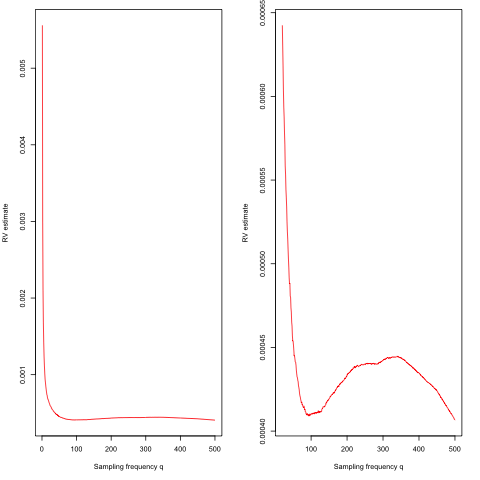

In [15]:
nn <- 1000
rv <- sapply(1:nn,function(q){rCov(diff(log(p),lag=q))/q})

# Signature plot
m <- 500
par(mfrow=c(1,2),cex=.6,mar=c(5,4,1,2)+.1)
plot(1:m,rv[1:m],col="red",type="l",ylab="RV estimate",xlab="Sampling frequency q")
plot(20:m,rv[20:m],col="red",type="l",ylab="RV estimate",xlab="Sampling frequency q")
par(mfrow=c(1,1))

### Oomen’s noise-to-signal ratio

Following Oomen, we define the noise-to-signal ratio:

$$\xi=\frac{\mbox{Var}[\epsilon]}{\sigma^2}.$$ 

$\xi$ may be efficiently estimated using

$$Var[\epsilon]\sim -\frac{1}{T}\,\sum^T\,(Y_{i+1}-Y_{i})(Y_i-Y_{i-1})$$

which is just the square of the half-spread in the Roll model.



### The Roll model

Recall that in the Roll model, with

$$p_t=m_t+\epsilon_t,$$

the
effective half-spread is given by

$$c=\sqrt{-\gamma_1}$$ and
$$\sigma^2=\gamma_0+2\,\gamma_1$$



### The conventional solution

-   The conventional solution is to sample at most every five minutes or
    so.

    -   In our BAC dataset, there are 17,858 trades. Then there are 229
        trades every 5 minutes.

    -   We get an annualized volatility of around $33\%$. Compare this
        with $39\%$ and $40\%$ 1-month historical and implied
        respectively on 04-May-2012.

    -   Sampling only every 5 minutes corresponds to throwing out 99.6%
        of the points!

-   To quote Zhang, Mykland and Aït-Sahalia, “It is difficult to accept
    that throwing away data, especially in such quantities, can be an
    optimal solution.”


-   From a more practical perspective, if we believe that volatility is
    time- varying, it makes sense to try and measure it from recent data
    over the last few minutes rather than from a whole day of trading.

### Subsampling

-   Denote by $Y_{jk}\,\,(1 \leq j \leq k)$, the subsample of $Y$
    obtained by sampling every $k$ ticks from the $j$th tick on.

-   There are clearly $k$ such non-overlapping subsamples in the
    dataset, the first one beginning with the first tick, the second
    with the second tick and so on.

-   Then, for each $Y_{jk}$, we have 

    $$[Y_{jk},Y_{jk}]\sim
    \left[X_{jk},X_{jk}\right]+2\,n_{jk}\,\mbox{Var}[\epsilon]$$
    

-   Now define the average subsampled realized variance
    $$[Y,Y]_k:=\frac{1}{k}\,\sum_j^k\,[Y_{jk},Y_{jk}]$$ and suppose
    further that the *per tick* variance $\sigma^2$ is constant.

-   Then 

    $$[Y,Y]_k \sim \bar n_k\,k\,\sigma^2+2\,\bar n_k\,Var[\epsilon]$$
    
    where $\bar n_k$ is the average number of ticks
    in each subsample.

-   We obtain the estimator

    $$v^{Realized}_k= \frac{[Y,Y]_k}{\bar n_k\,k}$$

### The ZMA estimator

With our earlier assumption of iid noise, we can eliminate bias for each
$k$ by forming

\begin{eqnarray*}
[Y,Y]_k-\frac{\bar n_k}{n}\,[Y,Y] \sim \bar n_k\,k\,\sigma^2-\bar
n_k\,\sigma^2\end{eqnarray*}

Thus we obtain the Zhang-Mykland-Aït-Sahalia (ZMA) bias-corrected
estimator of $\sigma^2$:

$$v^{ZMA}_k:=\frac{1}{\bar n_k\,(k-1)} \, \left\{[Y,Y]_k-\frac{\bar
n_k}{n}[Y,Y]\right\}$$



### The Zhou estimator

Define

$$
\begin{eqnarray*}
[Y,Y]^Z: &=& \sum_i^T\,(Y_i-Y_{i-1})^2
+ \sum_i^T\,(Y_i-Y_{i-1})(Y_{i-1}-Y_{i-2})\\ 
&&+ \sum_i^T\,(Y_i-Y_{i-1})(Y_{i+1}-Y_{i})
\end{eqnarray*}
$$
It’s easy to check that under the assumption of serially uncorrelated
noise independent of returns,
$\mathbb{E}\left[[Y,Y]^Z\right]=\langle X\rangle_T$.

It follows that

$$[Y_{jk},Y_{jk}]^Z \sim (n_{jk}-2)\,\sigma^2$$



### Subsampled Zhou estimator

As suggested by Zhou himself, we may compute his estimator from
subsamples of the data obtaining

$$v^{Zhou}_k:=\frac{1}{\bar n_k-2}\,[Y,Y]^Z_k$$



### Notation

-   Given an observed price series $\{p_i\}_{i=0}^T$, let

    <a name="Eqn:gamma"></a>(1)
    $$\gamma_{h,q}(k) = \sum_{i=1}^{m} (p_{iq+h}-p_{(i-1)q+h})(p_{(i+k)q+h}-p_{(i-1+k)q+h}),$$

    where $m = \lfloor (T-h+1)/q\rfloor-k$.

    -   Thus $q$ is the sub-sampling frequency, $h$ is the index of a
        given subsample and $k$ is a time-offset.

-   Many of the realized variance measures are derived in a setting
    where observed prices are modeled as $p_{t_i} = \int_0^{t_i}
    \sigma_u\,dW_u+\omega\,\varepsilon_{t_i}$ with $W\perp \varepsilon$.

    -   Error estimates typically require measurements of the
        latent integrated variance $IV=\int_0^1\sigma_u^2du$, integrated
        quarticity $IQ=\int_0^1\sigma_u^4du$, and noise variance
        $\omega^2$.

### Mean-squared error

-   Mean-squared error (MSE) of an estimator $\theta$ of some quantity
    $\theta$ is defined by:
    
    $$\text{MSE}[\hat \theta]=\mathbb{E} [(\hat \theta- \theta)^2]$$


-   Bias is given by $\mathbb{E} [\hat \theta -\theta]$.


-   Variance of the estimator is given by

    $$\mathbb{E} [(\hat \theta-\mathbb{E} [\hat \theta])^2]$$

-   Then

    \begin{eqnarray*}
    \text{MSE}&=&\mathbb{E} [(\hat \theta- \mathbb{E} [\hat \theta]+\mathbb{E} [\hat \theta]-\theta)^2]\\
    &=&\mathbb{E} [(\hat \theta- \mathbb{E} [\hat \theta])^2]+(\mathbb{E} [\hat \theta-\theta])^2\\
    &=&\text{Variance}+\text{Bias}^2\end{eqnarray*}

### Estimator consistency and efficiency

-   An estimator $\hat \theta$ is <span>*consistent*</span> if it
    converges in probability to the true value $\theta$.

-   Estimator $A$ is more <span>*efficient*</span> than estimator B if
    $\mathbb{E} [(A-\theta)^2]<\mathbb{E} [(B-\theta)^2]$.

-   An <span>*efficient*</span> estimator is the most efficient one.


-   An article in econometrics describing a new estimator typically
    proves that this new estimator is asymptotically consistent and
    efficient in the limit that the number of samples $n \to \infty$.



### Optimal sampling frequency

-   The optimal sampling frequency is such that MSE is minimized.

    -   As sampling frequency increases, the variance of the estimate of
        realized variance decreases but its bias typically increases.

    -   This optimal sampling frequency may been computed theoretically
        for various estimators of realized variance under idealized
        assumptions.

-   Analogously, for the estimators that we now describe, there is
    typically a parameter (such as the subsampling frequency $q$) that
    theoretically minimizes MSE under given assumptions for the
    underlying and noise processes.

### Zhou and ZMA estimators in updated notation

With our updated notation:

-   The Zhou estimator becomes

    <a name="Eqn:ZHOU"></a>(2)
    $$ZHOU = \frac{T}{T-q+1}\frac{1}{q}\sum_{h = 0}^{q-1} (\gamma_{h,q}(0)+2\gamma_{h,q}(1)),$$

-   The ZMA (or two-scale RV) estimator becomes:

    <a name="Eqn:TSRV"></a>(3)
    $$TSRV=\left( 1-\overline{T}/T\right) ^{-1}\left( \frac{1}{q}\sum_{h = 0}^{q-1}\gamma
    _{h,q}(0)-\frac{\overline{T}}{T}\gamma_{0,1}(0)\right),$$

    where $\overline{T} =(T-q+1)/q$

### Multiscale RV

Zhang’s multiscale RV estimator is given by

<a name="Eqn:MSRV"></a>(4)
$$MSRV = \sum_{j = 1}^{q} \frac{a_j}{j} \sum_{h = 0}^{j-1}\gamma_{h,j}(0),$$

where

$$a_j^\ast = (1-1/q^2)^{-1}\left(\frac{j}{q^2}h(j/q)-\frac{j}{2q^3}h^\prime(j/q)\right)$$

and $$h(x) =12\,(x-1/2).$$



### Realized Kernel estimator of Barndorff-Nielsen, Hansen, Lunde and Shephard

<a name="Eqn:KRV"></a>(5)
$$KRV = \gamma_{0,1}(0)+2\sum_{s = 1}^q \kappa\left(\frac{s-1}{q}\right)\gamma_{0,1}(s).$$

Choices for the kernel $\kappa(x)$ include:

-   Modified Tukey-Hanning kernel TH$_{2}$: $\kappa\left( x\right)
    =\sin ^{2}\left\{\frac{\pi }{2}\left( 1-x\right) ^2\right\}$.

-   Cubic kernel: $\kappa\left( x\right)
    =1-3x^{2}+2x^{3}$.



### Large’s alternation estimator


<a name="Eqn:ALT"></a>(6)
$$ALT = \frac{C}{R}\,\gamma_{0,1}(0),$$

where $R$ ($C$) are the number of reversals (continuations) in the
sample.

-   Note that $C =
    \sum_{i=2}^{T} (I^p_i I^p_{i-1}+I^n_{i-1} I^n_i)$ and
    $R = \sum_{i=2}^{T}( I^p_i
    I^n_{i-1}+I^p_{i-1} I^n_i)$ where $I^p_i = I(r_i>0)$ and
    $I^n_i = I(r_i<0)$.

-   If there are zero returns in the sample then these are first
    removed, *i.e.*, the estimator is implemented using tick
    data.



### Large’s estimator

-   Suppose that $$\Delta p_t=p_t-p_{t-1}=\pm k$$ for some fixed number
    $k$. That is, the trade price jumps up and down by a constant (1
    cent say).


-   Recall that 

    $$\gamma_{0,1}(0)=\sum_t\,\Delta p_t^2=N\,k^2$$ 
    
    which is just $RV$. So 
    
    $$ALT = \frac{C}{R}\,RV$$

-   If the efficient price is constant, then $C=0$ and $ALT=0$.


-   If there is no microstructure noise, $C=R$ for a random walk and $ALT=RV$.


-   This estimator only works for large tick markets where the price
    moves by only one tick whenever it moves.

### Maximum Likelihood estimator of Aït-Sahalia, Mykland and Zhang

<a name="Eqn:MLRV"></a>(7)
$$MLRV =  M\,\widehat{\delta}^2\,(1+\widehat{\eta})^2,$$

where $(\widehat{\eta},\widehat{\delta^2})$ are the maximum likelihood
estimates of an MA(1) model for observed returns, <span>*i.e.*</span>
$r_i = \varepsilon_i+\eta \varepsilon_{i-1}$ where the $\varepsilon_i$’s
are serially uncorrelated with mean zero and variance $\delta^2$.



### Practical implementation

-   Ideally, we should be able to update a RV estimator in real time as
    ticks come in.

-   From this perspective, estimators where we can just add the most
    recent observation and drop the oldest observation are preferred.



### Convergence of TSRV, MSRV and kernel estimators

-   The TSRV two-timescale RV measure yields a consistent estimator of
    IV that converges at rate $M^{-1/6}$.


-   The rate of the TSRV estimator can be improved to $M^{-1/4}$ – the
    fastest attainable in this setting – by using multiple time scales
    as in the MSRV.


-   The realized kernels provide an equally efficient alternative to the
    subsampling estimators with rates of convergence of $M^{-1/6}$ or
    $M^{-1/4}$ depending on the choice of kernel (the TH$_{2}$ and cubic
    kernels converge at the fastest rate).
    

-   Finally, both the ALT and MLRV estimators are also consistent and
    converge at rate $M^{-1/4}$, albeit under more restrictive (semi-)
    parametric assumptions.


-   An important feature of the non-parametric RV measures TSRV, MSRV,
    and KRV is that they allow for stochastic volatility, leverage and
    can be made robust to dependent noise.

    -   ZHOU is biased with dependent noise

    -   ALT rules out leverage effects and requires uncorrelated noise

    -   Although MLRV can be modified to take account of dependent noise
        it does not allow for stochastic volatility.

### Using the mid-quote

-   What if quote data is available?


-   According to practitioners, using mid-quotes eliminates bid-ask
    bounce.

    -   If we use mid-quotes, do we get the same volatility estimate?

    -   When should we sample the mid-quotes? Every quote change? Every
        second?

-   According to Bouchaud, Gefen, Potters and Wyart(2004) and also Bandi 
    and Russell (2006), it's best to sample the mid-quote just before each 
    trade.


-   Let’s see how the autocorrelation plot and noise plot look with
    mid-quotes.

### BAC trades and quotes

In [17]:
bid <- as.numeric(tqBAC$BID)
ask <- as.numeric(tqBAC$OFR)
mid <- (bid+ask)/2

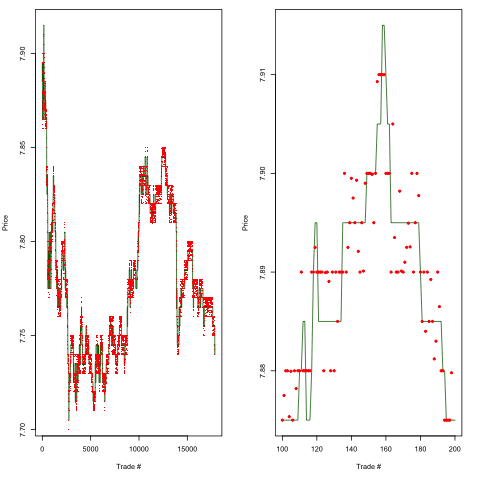

In [18]:
par(mfrow=c(1,2),mar=c(5,4,1,2)+.1,cex=.6)
plot(mid,col="dark green",type="l",ylab="Price",xlab="Trade #")
points(p,col="red",type="p",pch=".")
plot(100:200,mid[100:200],col="dark green",type="l",ylab="Price",xlab="Trade #")
points(100:200,p[100:200],col="red",type="p",pch=20)
par(mfrow=c(1,1))

<span>BAC data from 04-May-2012. Mid-quotes in green, trade prices in
red.</span>

### Autocorrelation of BAC mid-quote changes

<span>BAC data from 04-May-2012.</span>

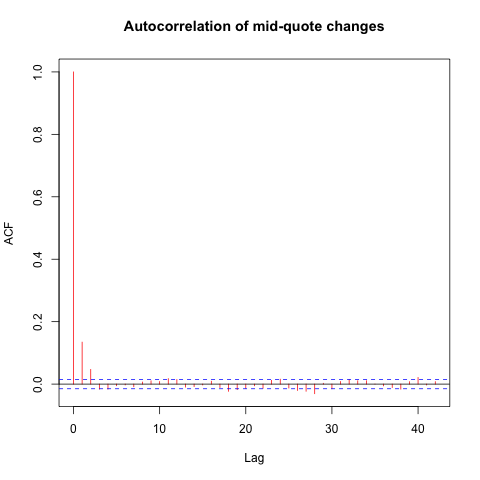

In [19]:
# Plot autocorrelation function of mid-quote changes
dm <- diff(log(mid))
acm <- acf(dm,plot=F)
plot(acm,main="Autocorrelation of mid-quote changes",col="red")

-   We see higher order autocorrelations in the mid-quote data.

### BAC signature plot using mid-prices

Using BAC mid-price data from 04-May-2012, we again plot RV as function of sampling frequency $q$.

In [20]:
nn <- 10000
rvm <- sapply(1:nn,function(q){rCov(diff(log(mid),lag=q))/q})

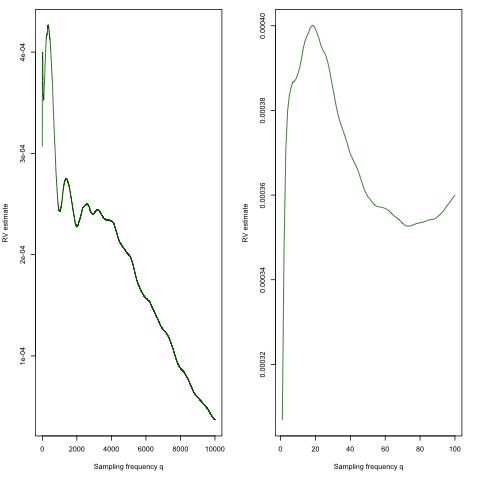

In [21]:
par(mfrow=c(1,2),cex=.6,mar=c(5,4,1,2)+.1)
plot(1:nn,rvm,col="dark green",type="l",ylab="RV estimate",xlab="Sampling frequency q")
plot(1:100,rvm[1:100],col="dark green",type="l",ylab="RV estimate",xlab="Sampling frequency q")
par(mfrow=c(1,1))

### ZI simulation

-   Given a set of tick data, what was the realized variance?


-   If we don’t know what the true value was, how can we test the
    performance of different estimators?

    -   One way is to simulate from a model which could be stochastic
        volatility or jump-diffusion for example.

    -   A noise process is typically added to the efficient price
        process.

-   [Gatheral and Oomen]<sup id="cite_ref-GatheralOomen" class="reference"><a href="#cite_note-GatheralOomen"><span>[</span>4<span>]</span></a></sup> generated simulations from the Smith Farmer
    zero-intelligence (ZI) model. This has the benefit that
    microstructure noise is in some sense much more realistically
    modeled.


-   We tested many different estimators and came up with a ranking.

### Gatheral Oomen results for mid-quotes

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/ziResults12.png" align = "center" width=750></h2>

### Gatheral Oomen results for mid-quotes

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/ziResults13.png" align = "center" width=750></h2>

### Conclusion of the ZI simulation: Which estimators are best?

-   Sample prices at the highest available frequency and then measure
    realized variance using one of:

    -   The Two-Scale ZMA estimator with a subsampling frequency of 5,

    -   The Multi-Scale RV of Zhang with 5 subsamples,

    -   The Realized Kernel of BNS with a bandwidth of 5.


-   The performance of these estimators is largely equivalent and their
    implementation equally straightforward, so which particular one to
    use would be a matter of taste.

-   Relative to the widely used sum of sparsely sampled returns
    following the “5-minute” rule prescribed in earlier literature, the
    efficiency gain achieved with these is likely to be substantial.

### Conclusion of the ZI simulation: What series to sample?

-   In terms of data sampling, use mid-quotes.


-   When sampled immediately prior to a trade, we ensure the same number
    of observations as for the trade data but with a heavily reduced
    level of microstructure noise.


-   The micro price is also preferred over the trade data but, despite
    some seemingly appealing features, does not seem to improve over
    mid-quote data. At least in the ZI simulation, it appears that
    micro-price had higher order autocorrelations.



### Conclusion of the ZI simulation: What bandwidth to use?

-   The rule for choosing $q$ should be to let $q$ grow with the level
    of noise so that with little noise we compute something that is
    close to RV and with high levels of noise we effectively reduce the
    sampling frequency so as to mitigate its impact.


-   The optimal bandwidth $q^\ast$ can be computed in closed-form for
    realized kernels, TSRV and MSRV. It is of the form:
    
    $$q^{\ast }=A\,\sqrt{\xi}.$$
    
    for some estimator-dependent constant
    $A$ where $\xi$ is the Oomen noise-to-signal ratio.


-   Alternatively, $q=5$ seems to work well nearly all of the time.



### Trades vs mid-quotes

-   [Barndorff-Nielsen et al.]<sup id="cite_ref-BNS" class="reference"><a href="#cite_note-BNS"><span>[</span>1<span>]</span></a></sup> point out that one way to assess the performance of an
    estimator on real data is to see if it gives the same result on
    trades and quotes.

    -   They find that results depend on the data-cleaning protocol
        followed.

    -   It’s better to take data from each exchange separately and
        average the results rather than supposing that all data comes
        from the same source.

 -   This might be less true now post Reg. NMS (Regulation National Market System).

 -   The realized kernel estimators do fine, giving similar results
        for trades and quotes.

 -   There are some days with lengthy strong trends which are not
        compatible with standard models of microstructure noise.

### The Uncertainty Zone (UZ) model of Robert and Rosenbaum

-   In a world with no microstructure noise but with prices quantized in
    ticks, participants would trade when the efficient price crosses the
    tick grid.


-   The idea of the model of [Robert and Rosenbaum]<sup id="cite_ref-RobertRosenbaum" class="reference"><a href="#cite_note-RobertRosenbaum"><span>[</span>7<span>]</span></a></sup> is that participants trade
    only when the efficient price is sufficiently far from the last
    traded price.

    -   Only transactions with price changes are modeled.

-   Thus, the model establishes a band of width $\eta$ around each
    mid-tick on the grid and price changes can occur only when the
    efficient price exits this band.


-   From [Figure 1](#fig:RobertRosenbaum), if the efficient price is
    $X_{\tau_i}$, it must be given by

    <a name="eq:efficientPrice"></a>(8)
    $$X_{\tau_i}=p_{t_i}-\alpha\,\left(\frac{1}{2}-\eta\right)\,\mbox{sign} (p_{t_i}-p_{t_{i-1}})$$

    where the transaction time $t_i > \tau_i$. $\alpha$ is the tick size. 

### Schematic of the price process
<a name="fig:RobertRosenbaum"></a>

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RobertRosenbaum.png" align = "center" width=550></h2>
Figure 1: Tick grid in green; mid-prices in red; uncertainty zones in blue.  For a transaction to occur at the grid point $L_0$ at time $t_i$, the efficient price $X_t$ must breach the uncertainty zone above or below.  Conditional on observing $L_0$ at time $t_i$, the efficient price must have been $L_0 - (1/2-\eta)\,\text{sign}(p_{t_{i}}-p_{t_{i-1}})$ at time $\tau_i < t_i$.

### Schematic of the price process

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RosenbaumPlot2.png" align = "center" width=600></h2>

### Estimating $\eta$

-   If we knew $\eta$, we could use [(8)](#eq:efficientPrice):

    $$X_{\tau_i}=p_{t_i}-\alpha\,\left(\frac{1}{2}-\eta\right)\,\mbox{sign} (p_{t_i}-p_{t_{i-1}})$$
    
    to impute the efficient price process and then compute integrated
    variance as
    
    $${RV}= \sum_i (X_{\tau_i}- X_{\tau_{i-1}})^2.$$



### Schematic of continuation and reversal (one tick case)

<a name="fig:CR"></a>
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/CR.png" align = "center" width=550></h2>
Figure 2: If there is a continuation (orange), the efficient price $X$ moves by $2$.  If there is a reversal (green), the efficient price moves by $-2\,\eta$.

### Martingale argument to estimate $\eta$

-   Assume $\alpha = 1$. From [Figure 2](#fig:CR), if a price change is a continuation, $X$ must
    have moved by $2$; if a reversal, $X$ must have moved by $-2\,\eta$.


-   Denote the probabilities of a continuation by $C$ and of a reversal
    by $R$. Then, because
    
    $$\mathbb{E} [\Delta X ] = C\,2 - R\,2\,\eta = 0$$
    
    we must have
    
    $$\eta = \frac C R.$$


-   In the case where the price may only move by one tick, the estimator
    $
    \hat \eta = C / R 
    $ is a consistent estimator of $\eta$.

    -   We recognize this as Large’s alternation estimator.

-   In an easy extension of the argument, if $C_k$ and $R_k$ are the
    probabilities of continuations and reversals of size $k$, we have
    
    $$\mathbb{E} [\Delta X ] = C\,k - R\,(k-1+2\,\eta) = 0.$$

### Estimation of $\eta$ in general

Let $\alpha$ be the tick size, $k$ the size of a price change in ticks.
Then 

$$\hat \eta = \sum_{k=1}^T\,\lambda_k\,u_k$$ 

with

$$\lambda_k=\frac{C_k+R_k}{\sum_{j=1}^m(C_j+R_j)};\quad u_k=\frac{1}{2}\,\left(k\,\left(\frac{C_k}{R_k}-1\right)+1\right)$$

where $C_k$ and $R_k$ are the numbers of continuations and reversals of size $k$.

-   The UZ estimator can be viewed as a generalization of the $ALT$
    estimator of Large to markets where the price may move by several
    ticks.


-   In fact, the UZ estimator can be made robust to bad data by
    considering only moves of one tick.

### Estimation of integrated variance

Integrated variance is estimated as

$$\widehat {RV}= \sum_i (\hat X_{t_i}-\hat X_{t_{i-1}})^2$$ with
$$\hat X_{t_i}=p_{t_i}-\alpha\,\left(\frac{1}{2}-\hat \eta\right)\,\mbox{sign} (p_{t_i}-p_{t_{i-1}})$$



### Pros and cons of the Robert-Rosenbaum model

-   Pros:

    -   Prices quantized in ticks

    -   Bid-ask bounce

    -   Inverse relation between durations and volatility.

    -   Price moves of several ticks are generated endogenously.

    -   Autocorrelograms and cross correlograms are realistic, both in
        calendar time and in trading time.

-   Cons:

    -   The data need to be very clean. If there are any outliers, they
        badly affect the UZ volatility estimate.

### Estimates of realized variance of BAC data

To make the estimates easier to interpret, we quote
$\sqrt{RV} \sim \sigma\,\sqrt{T}$. Thus, a good estimate should be of
the order of $2\%$ or so.

<span>Table 1. BAC data from 04-May-2012.</span>


|   | Trades | Quotes |
|---|--------|--------|
| RV(q=1)  | 7.46%       |   1.75%     |
| RV(q=229)$^1$ | 2.34%       |   2.19%     |
| TSRV(q=5)  | 1.96%       |   2.01%     |
| MSRV(q=5)  | 1.95%       |   2.01%     |
| KRVTH(q=5)  | 1.94%       |   2.02%     |
| KRVC(q=5)  | 1.94%       |   2.01%     |

---
$^1$This is roughly 5 minutes


### BAC volume profile

Using BAC size data from 04-May-2012, we plot the volume profile.

In [22]:
ep <- endpoints(tqBAC,'minutes',k=1)
ne <- length(ep)
ep <- ep[-ne]
sz <- function(x){mean(as.numeric(x$SIZE))}
szVec <- period.apply(tqBAC, INDEX=ep, FUN= sz)
ns <- length(szVec)

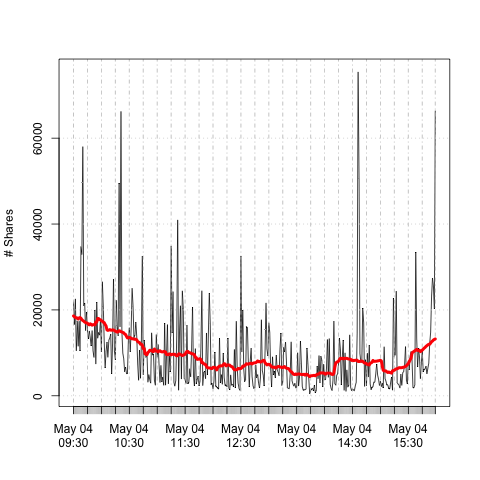

In [26]:
plot(szVec, ylab = "# Shares", main=NA)
ks <- ksmooth(1:ns,szVec, bandwidth=50)$y
sz2 <- as.xts(cbind(szVec,ks))
names(sz2) <- c("SIZE", "kSIZE")
lines(sz2$kSIZE,col="red",lwd=4)

-   <span>The red line is kernel-smoothed volume</span>

### BAC volume and realized variance profiles

Using the same data, we compute realized variance from mid-quotes with the Tukey Hanning kernel ($q=5$) (KRV).

In [29]:
rv <- function(x){
  mid <- (as.numeric(x$BID) + as.numeric(x$OFR))/2
  rv <-KRVTH(mid,5)
  return(rv)
}
sz <- function(x){mean(as.numeric(x$SIZE))}

ep <- endpoints(tqBAC,'minutes',k=5)
ep <- ep[-length(ep)]
szVec <- period.apply(tqBAC, INDEX=ep, FUN= sz)
rvVec <- period.apply(tqBAC, INDEX=ep, FUN= rv)

Now, we show the volume and RV plots together.

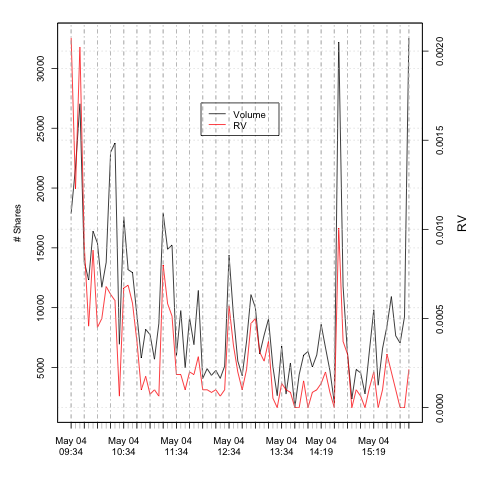

In [40]:
par(mar = c(5,5,2,5),cex=0.8)
plot(szVec, ylab = "# Shares",  main=NA)
par(new = T)
plot(rvVec, col = "red", axes = F, xlab = NA, ylab = NA,main=NA)
axis(side = 4)
mtext(side = 4, line = 3, "RV")
legend("top",inset=0.2,legend=c("Volume    ","RV"),col=c("black","red"),lwd=c(1,1))

-   <span>The red line is kernel-smoothed volume; the black line is KRV.</span>

### Estimating covariance

-   The natural estimator of covariance is just

    $$\frac{1}{T}\,\sum_{i=1}^T\,\Delta p^{(1)}_i\,\Delta p^{(2)}_i$$
    
    where $p^{(1)}$ and $p^{(2)}$ are prices of two assets.

-   However the prices $p^{(i)}$ are usually asynchronous.

-   Consequently, this estimator decreases as sampling frequency
    increases.

    -   In fact, [Hayashi and Yoshida]<sup id="cite_ref-HayashiYoshida" class="reference"><a href="#cite_note-HayashiYoshida"><span>[</span>5<span>]</span></a></sup> show under pretty innocuous assumptions
        that it tends to zero as sampling frequency increases.


-   This is called the <span>*Epps Effect*</span>.

### The Hayashi-Yoshida estimator

$$HY_t=\sum_{i \leq t}\,\sum_{j \leq t}\,(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_j-p^{(2)}_{j-1})\,v_{ij}$$
where

$$v_{ij}={\bf 1}_{[t_{i-1},t_i] \cap [t_{j-1},t_j] \neq \emptyset}$$

In
words, the sum is over all overlapping intervals.



### How does Hayashi-Yoshida work?

Suppose

\begin{eqnarray*}
dp^{(1)}_t&=&\sigma_1\,dZ_1\\
dp^{(2)}_t&=&\sigma_2\,dZ_2\end{eqnarray*}

with $\mathbb{E} [dZ_1\,dZ_2]=\rho\,dt$. Then

$$
\begin{eqnarray*}
\mathbb{E} \left[(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_j-p^{(2)}_{j-1})\right]
&=&\mathbb{E} \left[\int_{t_{i-1}}^{t_i}\,\sigma_1\,dZ_1\,\int_{t_{j-1}}^{t_j}\,\sigma_2\,dZ_2\right] 
\\&=& \int_{[t_{i-1},t_i] \cap [t_{j-1},t_j] }\,\rho\,\sigma_1\,\sigma_2\,dt.
\end{eqnarray*}
$$

Summing over all partitions of the interval $[0,T]$ gives the result.

### Volatility forecasting

- It is by now well established that volatility forecasts are substantially improved by using accurate estimates of realized variance.


- We now briefly review two of the best performing estimators:

    - The HAR-RV (Heterogeneous
    Autoregressive Realized Variance) estimator of [Corsi]<sup id="cite_ref-Corsi" class="reference"><a href="#cite_note-Corsi"><span>[</span>2<span>]</span></a></sup>.
    - The Rough Volatility estimator of [Gatheral, Jaisson and Rosenbaum]<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>3<span>]</span></a></sup>.
    

### The Corsi HAR-RV forecast

-   The package `highfrequency` implements a regression to
    fit the parameters HAR-RV.


-   This model can be regarded as a poor man’s version of a long memory
    model such as ARFIMA.

    -   True long-memory models such as ARFIMA are notoriously hard to
        fit.


-   HAR-RV can also be considered an intelligent alternative to GARCH.

-   The model boils down to the regression

    $$RV_{t,t+h} = \beta_0 + \beta_D\,RV_t + \beta_W\,RV_{t-5,t} + \beta_M\,RV_{t-22,t} + \epsilon_{t,t+h}.$$
    
    In words, the RV forecast for $h$ days from now is a linear
    combination of the current realized variance and (aggregate) RV
    estimates for the last week and the last month.

### Example 

In [41]:
# Forecasting daily Realized volatility for DJI 2008 using the basic harModel: HARRV

data(realized_library); #Get sample daily Realized Volatility data
DJI_RV <- realized_library$Dow.Jones.Industrials.Realized.Variance; #Select DJI
DJI_RV <- DJI_RV[!is.na(DJI_RV)] #Remove NA's
DJI_RV <- DJI_RV['2008']


Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0017683 -0.0000626 -0.0000427 -0.0000087  0.0044331 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 4.432e-05  3.695e-05   1.200   0.2315    
beta1 1.586e-01  8.089e-02   1.960   0.0512 .  
beta2 6.213e-01  1.362e-01   4.560 8.36e-06 ***
beta3 8.721e-02  1.217e-01   0.716   0.4745    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0004344 on 227 degrees of freedom
Multiple R-squared:  0.4679,	Adjusted R-squared:  0.4608 
F-statistic: 66.53 on 3 and 227 DF,  p-value: < 2.2e-16



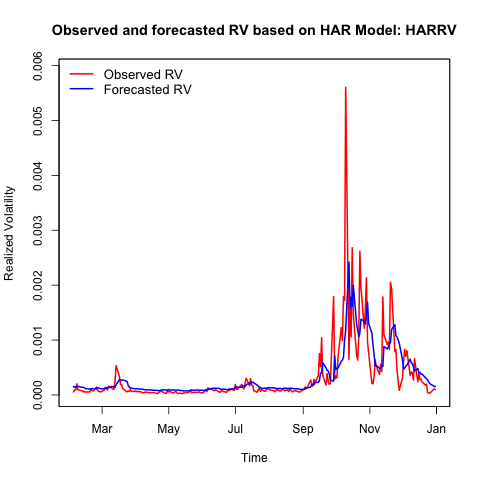

In [44]:
x <- harModel(data=DJI_RV , periods = c(1,5,22), RVest = c("rCov"), type="HARRV",h=1,transform=NULL)
plot(x)
print(summary(x))

###The Rough Volatility forecast
 

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
Variance forecast formula</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>

<a name="eq:vForecast"></a>(3)
$$
\eef{v_{t+\Delta}}=\exp\left\{\eef{\log(v_{t+\Delta})}+2\, c\,\nu^2\Delta^{2\,H}\right\}
%\label{eq:vForecast}
$$

<br>

</div>

</blockquote>

where 

$$
\beas
&&\eef{\log v_{t+\Delta}}\\
&&= \frac{\cos(H\pi)}{\pi} \Delta^{H+1/2} \int_{-\infty}^t \frac{\log v_s}{(t-s+\Delta)(t-s)^{H+1/2}} ds.
\eeas
$$

### VolX

- The commercial company VolX (http://volx.us) has developed a number of RealVol Instruments and RealVol Indices based on realized volatility as defined by the RealVol Formulas.
    - Their business model is to license these indices to exchanges and information providers.


- They publish daily forecasts of RV using HARK (which is HAR-RV with Kalman filtering, and RVOL, an implementation of the Rough Volatility forecast.


- You can compare forecast versus actual volatility for the two estimators here: http://www.volx.us/volatilitycharts.shtml?2&SPY&PRED.

### VolX screenshots

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/03/RVOL.png" align = "center" width=750></h2>

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/03/RVOLdist.png" align = "center" width=750></h2>
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/03/HVOLdist.png" align = "center" width=750></h2>

### RV data from the Oxford-Man Institute

-   In principle, it is straightforward to compute RV every day for any
    given underlying using one of the better RV estimators we presented
    above.


-   In practice, this involves a lot of data work, especially cleaning.

-   The R-package `highfrequency` has some historical RV
    data sourced from the Oxford-Man Institute of Quantitative Finance
    Realized Library.

    -   More such data is publicly available at
        <http://realized.oxford-man.ox.ac.uk>.

        -   In particular, various historical RV estimates for SPX are
            available.

        -   Data is updated daily.

### Summary

-   There has been a huge expansion in the literature on realized
    variance and covariance estimation since around 2003 with many very
    interesting papers.


-   As a result, we now have very efficient estimators for realized
    variance that take into account all of the available information.

    -   The newer volatility estimators are all very much more efficient
        that RV sampled every 5 minutes.

    -   Moreover, kernel-based estimators are easily updated in real
        time by adding the most recent tick and dropping the oldest
        tick.



### References
<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-BNS"><span class="mw-cite-backlink"><b><a href="#cite_ref-BNS">^</a></b></span>O.E Barndorff-Nielsen, P.R Hansen, A Lunde, N
Shephard, Realized kernels in practice: Trades and quotes,
<span>*Econometrics Journal*</span> <span>**12 (3)**</span> 1–32 (2009).
  </li>
  
  <li id="cite_note-Corsi"><span class="mw-cite-backlink"><b><a href="#cite_ref-Corsi">^</a></b></span>Fulvio Corsi, A simple approximate long-memory model of realized
volatility, <span>*Journal of Financial Econometrics*</span>
<span>**7**</span>(2) 174–196 (2009). </li>
  
<li id="cite_note-GJR"><span class="mw-cite-backlink"><b><a href="#cite_ref-GJR">^</a></b> Jim Gatheral, Thibault Jaisson and Mathieu Rosenbaum, Volatility is rough, available at http://papers.ssrn.com/sol3/papers.cfm?abstract_id=2509457, (2014).</li>  

<li id="cite_note-GatheralOomen"><span class="mw-cite-backlink"><b><a href="#cite_ref-GatheralOomen">^</a></b></span>Jim Gatheral and Roel C. A Oomen, Zero-intelligence
realized variance estimation, <span>*Finance and Stochastics
*</span><span>**14**</span>(2) 249–283 (2010).
  </li>

<li id="cite_note-HayashiYoshida"><span class="mw-cite-backlink"><b><a href="#cite_ref-HayashiYoshida">^</a></b></span>Takaki Hayashi and Nakahiro Yoshida, On covariance
estimation of non-synchronously observed diffusion processes,
<span>*Bernoulli *</span><span>**11**</span>(2) 359–379 (2005).
  </li>
  
    <li id="cite_note-McAleerMedeiros"><span class="mw-cite-backlink"><b><a href="#cite_ref-McAleerMedeiros">^</a></b></span>Michael McAleer and Marcelo C. Medeiros ,
Realized Volatility: A Review, <span>*Econometric Reviews*</span>
<span>**27**</span>(1) 10–45 (2008).
  </li>
  
    <li id="cite_note-RobertRosenbaum"><span class="mw-cite-backlink"><b><a href="#cite_ref-RobertRosenbaum">^</a></b></span>Christian Y. Robert and Mathieu Rosenbaum,
Volatility and covariation estimation when microstructure noise and
trading times are endogenous, <span>*Mathematical Finance*</span>
<span>**22**</span>(1), 133–164 (2012).
  </li>
</ol>